### 리드미 용 그래프

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

이상치 탐색

In [2]:
data_dir = 'C:\\KIMUJUNG\\team_project\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_total.csv")
df.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
0,94959,1,0,NaN,7,20110914,0,0,870,3981,...,30,11509,1551,1074,1030,26891,29141,7395726.684,20150101,20170331
1,6597367,4,30,male,9,20110916,0,0,603,2980,...,21,77,22,16,44,658,287,171508.646,20150209,20170331
2,3629318,5,34,male,9,20110916,1,0,360,1072,...,2,145,84,58,42,1678,1158,448313.054,20160822,20170330


In [5]:
data_dir = 'D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_total.csv")
df.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_start,log_end
0,94959,1,0,NaN,7,20110914,0,0,870,3981,...,30,11509,1551,1074,1030,26891,29141,7395726.684,20150101,20170331
1,6597367,4,30,male,9,20110916,0,0,603,2980,...,21,77,22,16,44,658,287,171508.646,20150209,20170331
2,3629318,5,34,male,9,20110916,1,0,360,1072,...,2,145,84,58,42,1678,1158,448313.054,20160822,20170330


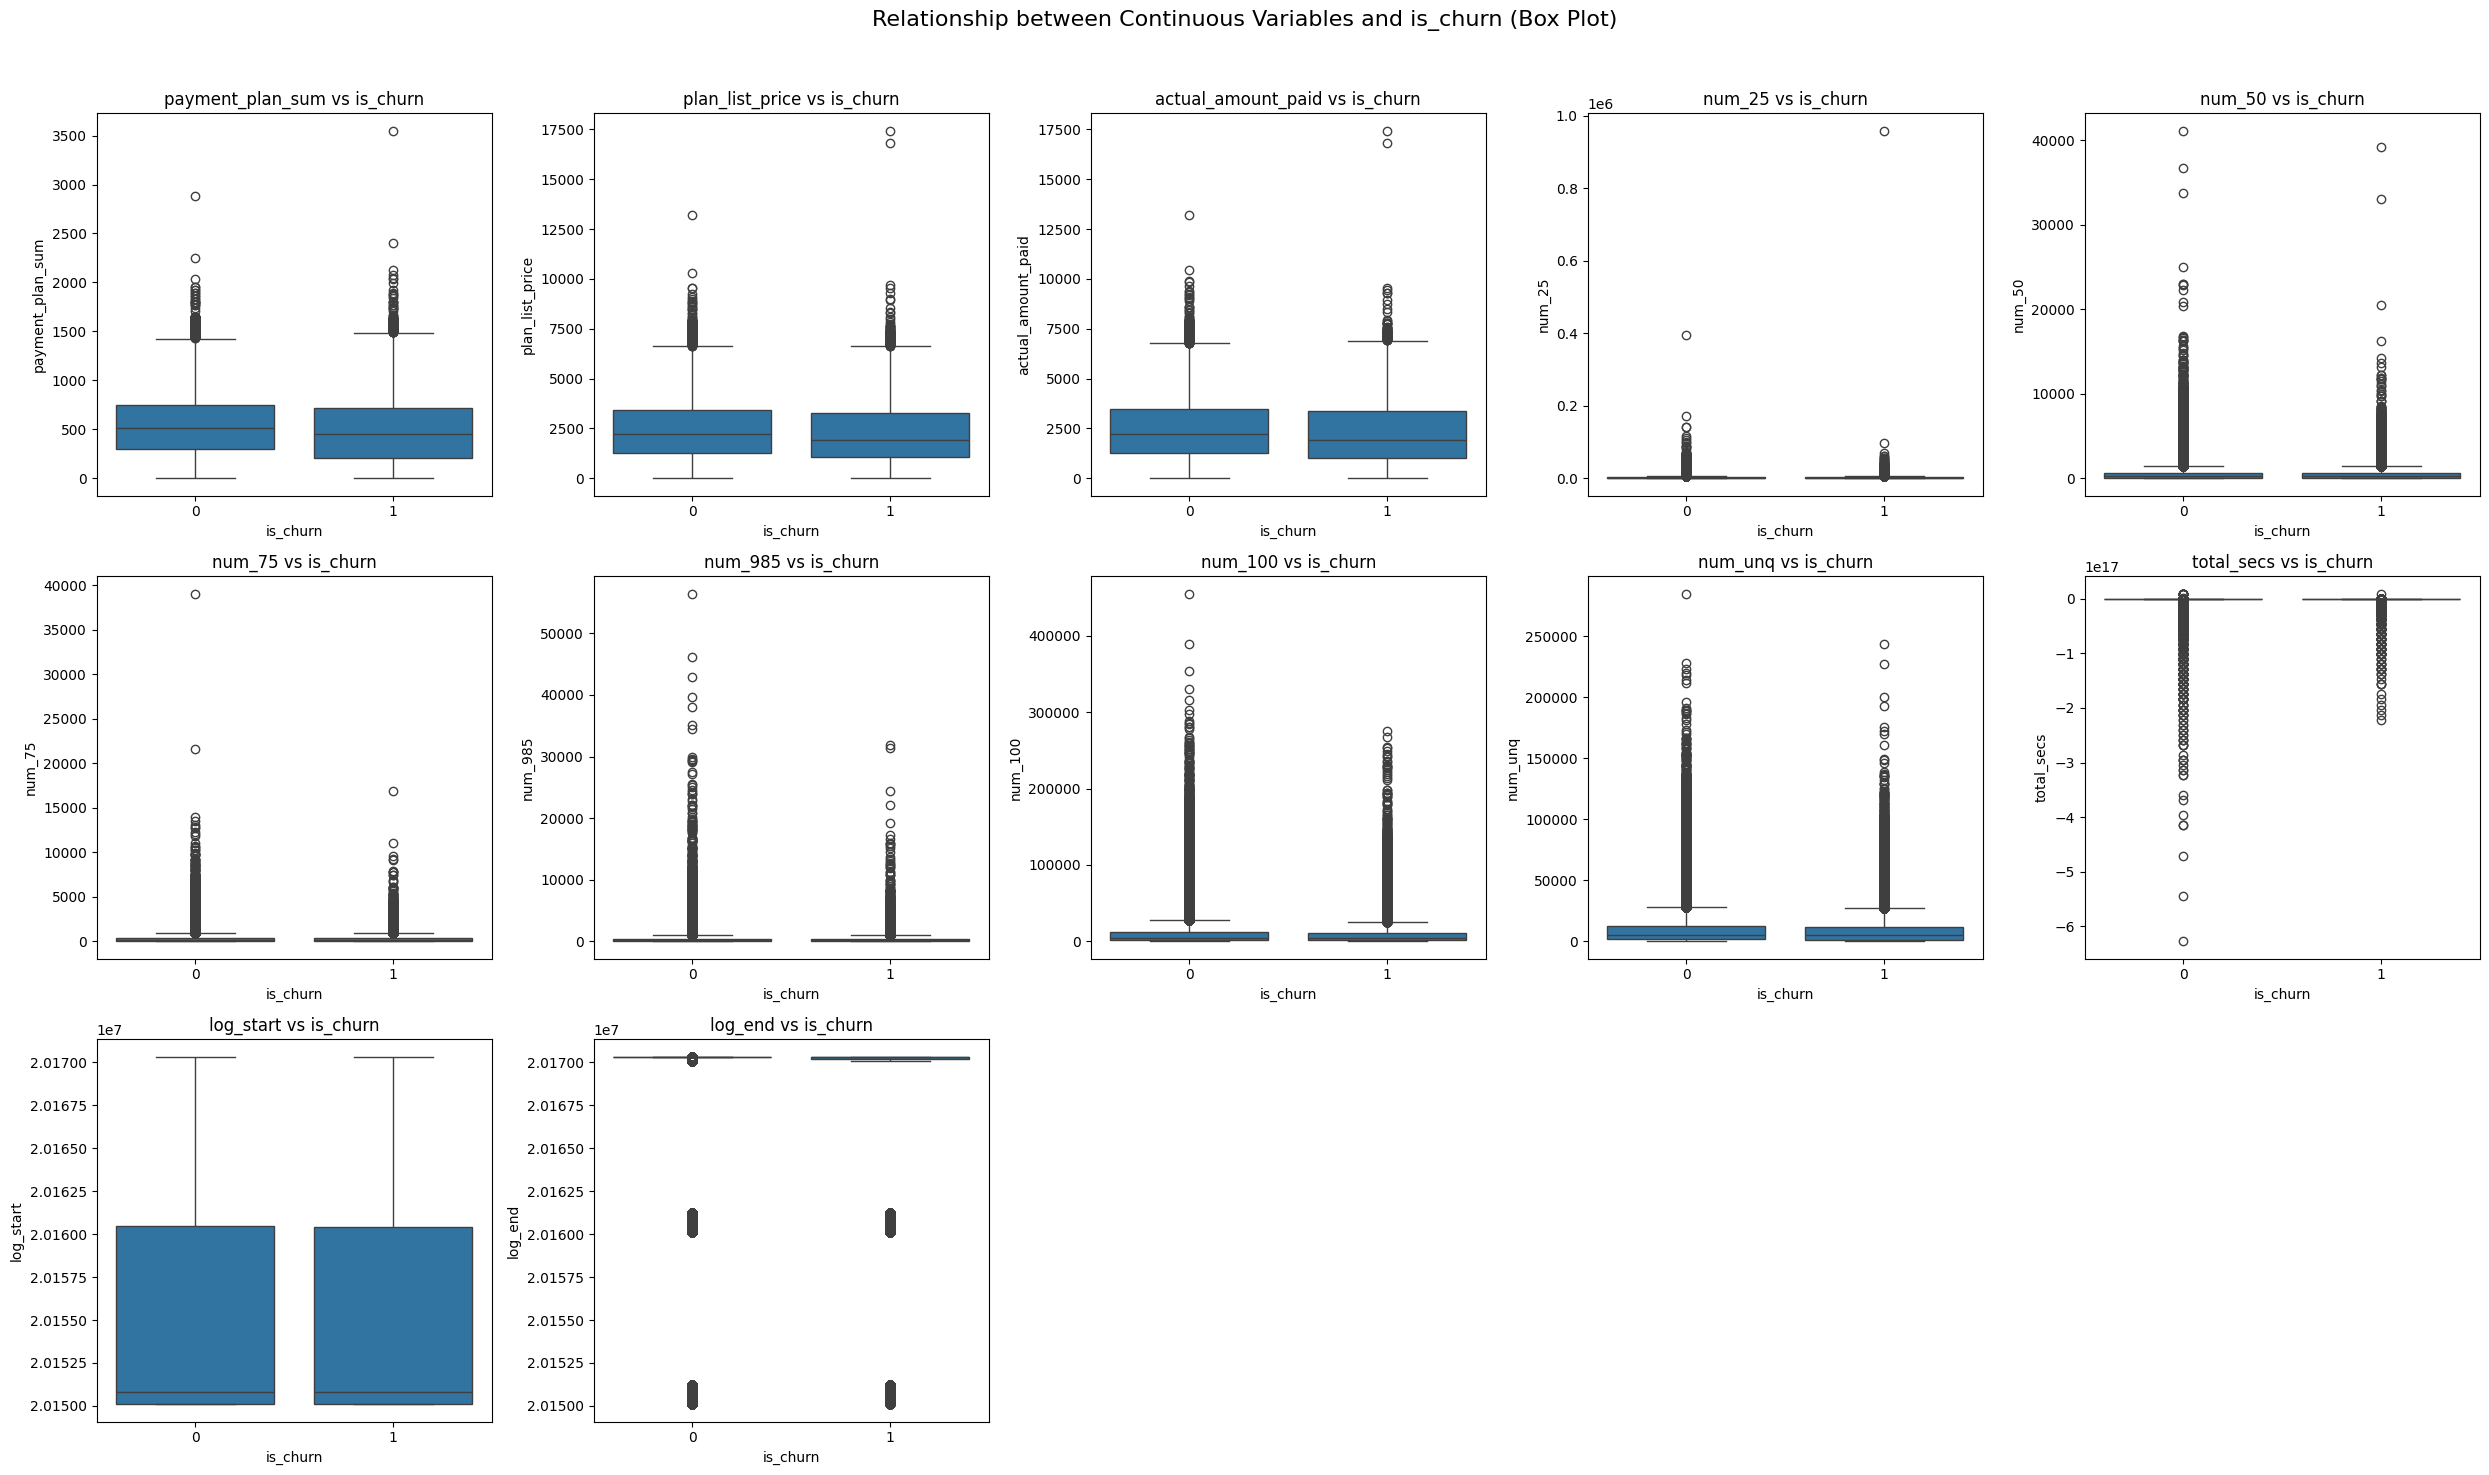

In [6]:
# 연속형 변수 목록
continuous_cols = ['payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
aa = df[df['payment_plan_sum'].isin([0, 2882, 3550])].index
df.drop(aa, inplace=True)
bb = df[df['plan_list_price'].isin([0, 13186, 16800, 17433])].index
df.drop(bb, inplace=True)
cc = df[df['plan_list_price'].isin([0, 13186, 16800, 17433])].index
df.drop(cc, inplace=True)

In [7]:
aa = df[df['num_25'] >= 20000].index
df.drop(aa, inplace=True)
bb = df[df['num_50'] >= 30000].index
df.drop(bb, inplace=True)
cc = df[df['num_75'] >= 10000].index
df.drop(cc, inplace=True)
dd = df[df['num_985'] >= 20000].index
df.drop(dd, inplace=True)
ee = df[df['num_100'] >= 35000].index
df.drop(ee, inplace=True)
ff = df[df['num_unq'] >= 24000].index
df.drop(ff, inplace=True)
gg = df[df['total_secs'] < 0].index
df.drop(gg, inplace=True)
df.drop(df[df['msno'] == 4524786].index, inplace=True)

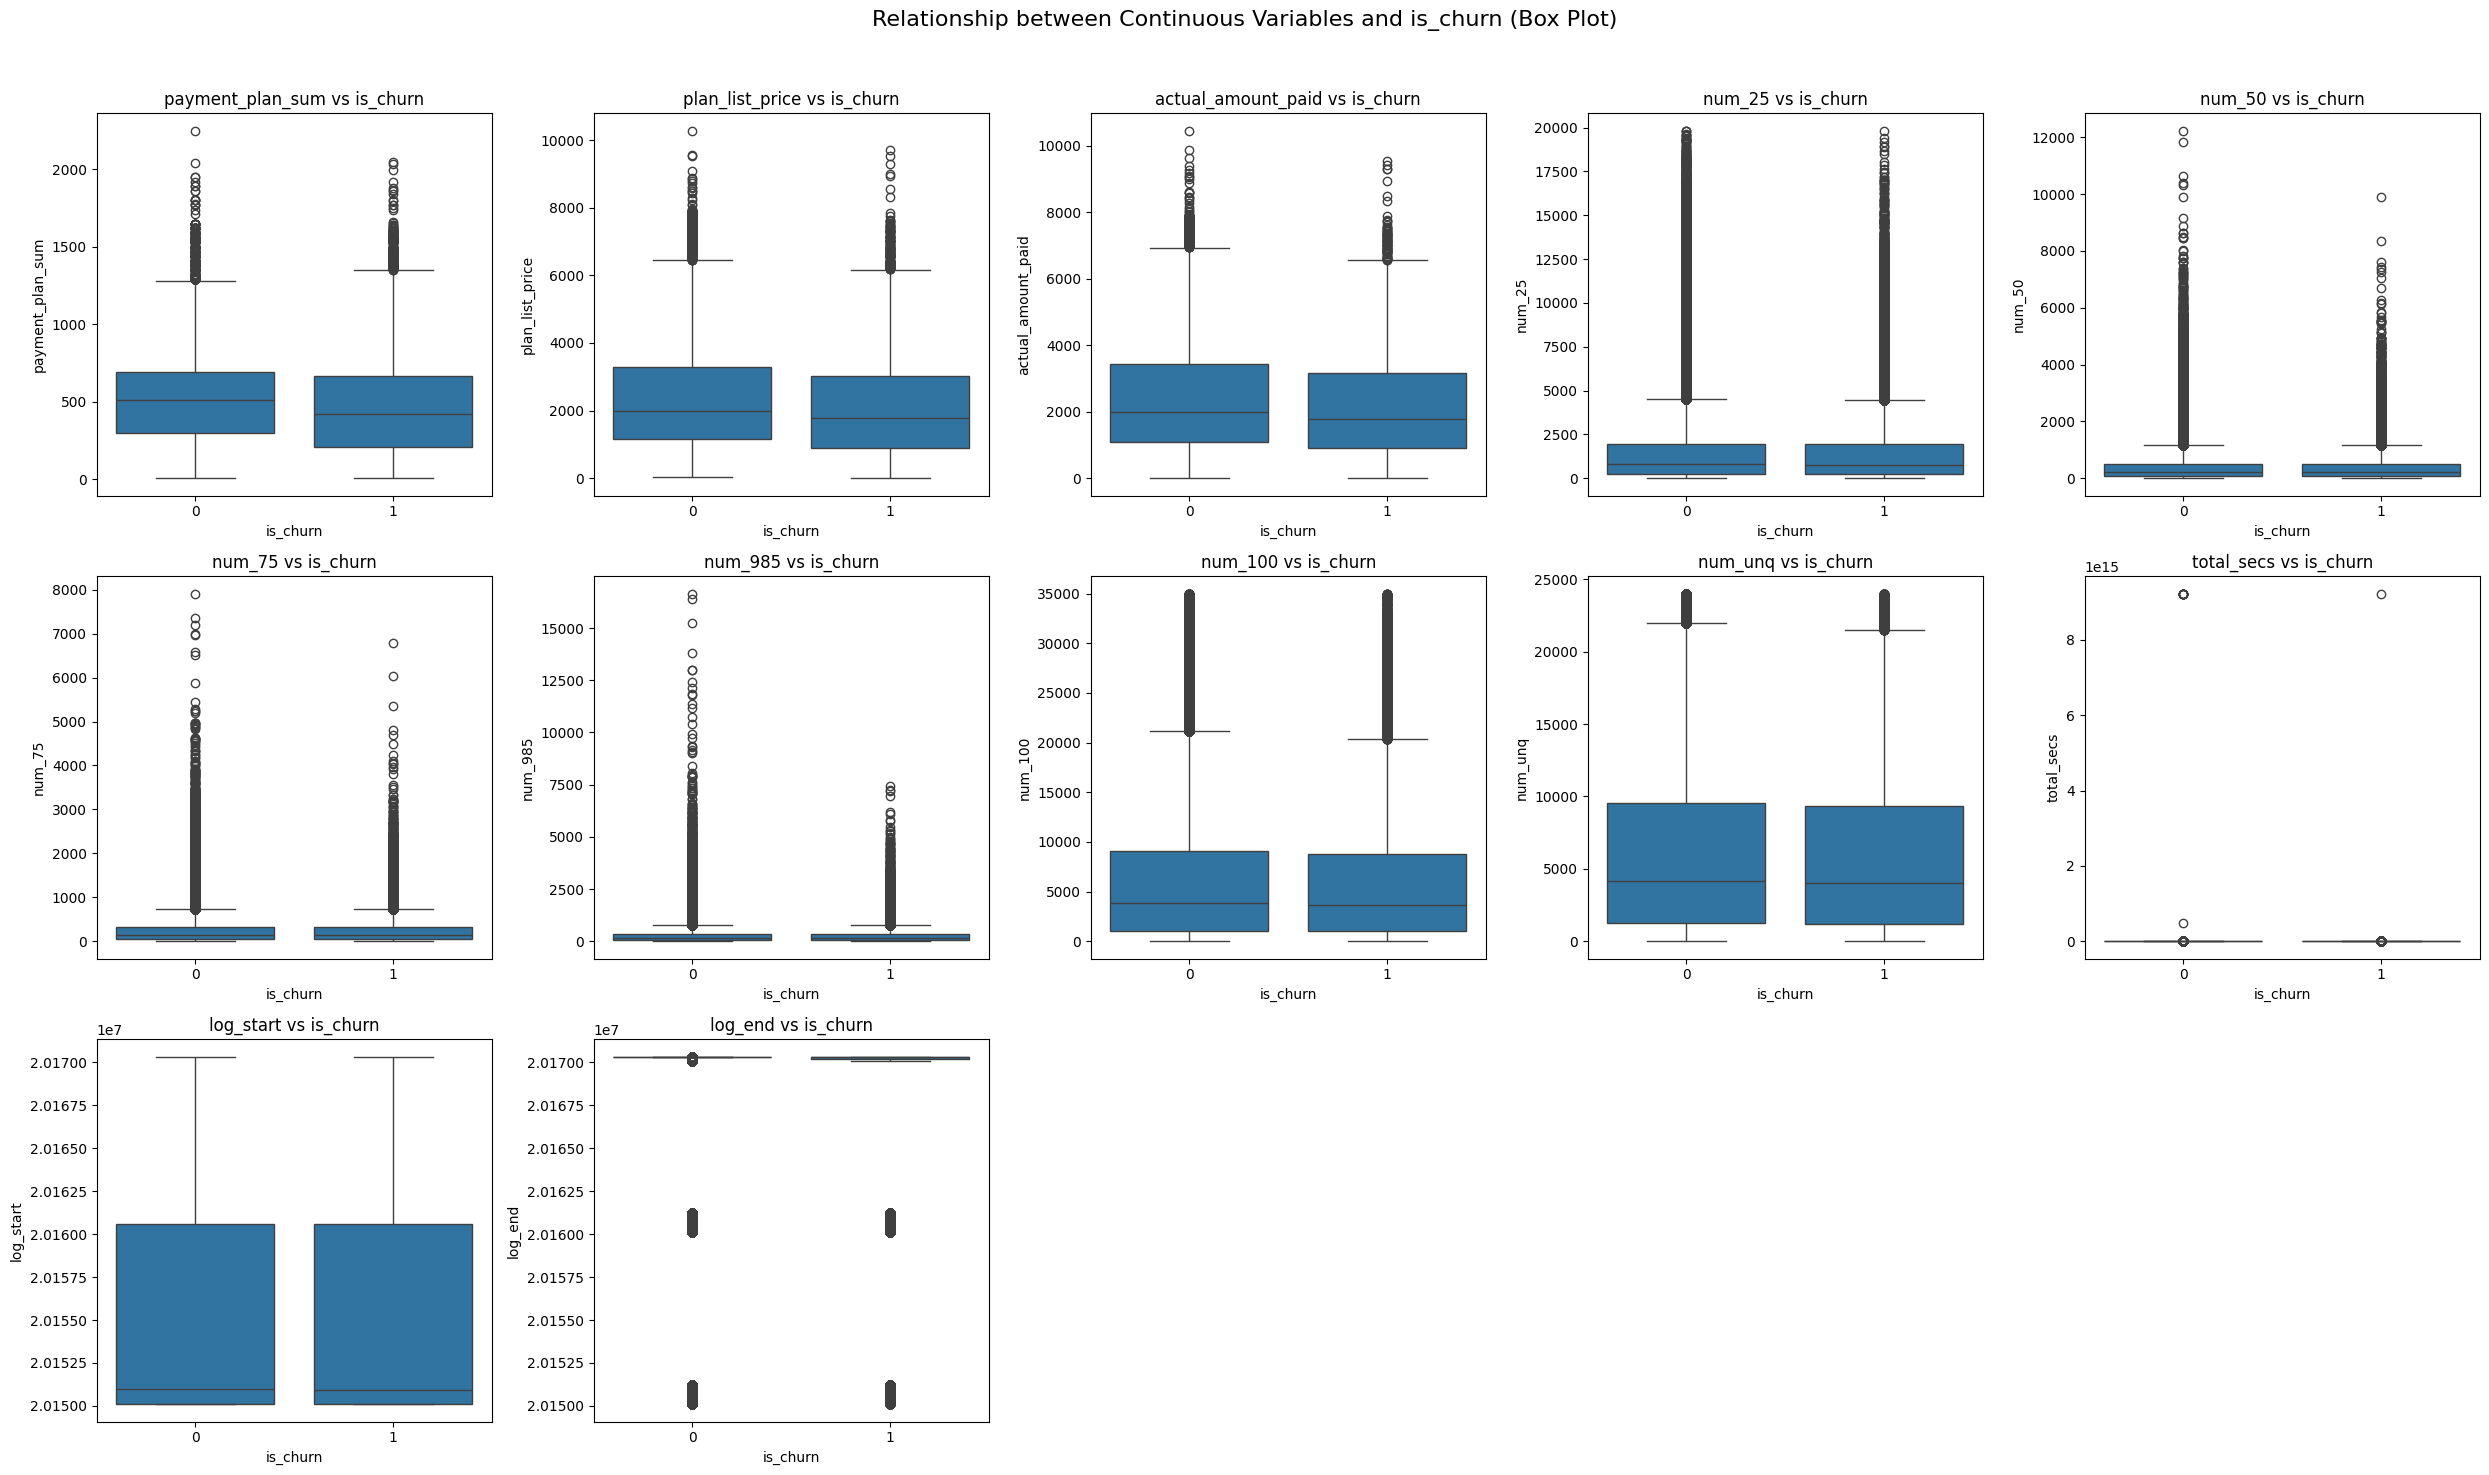

In [9]:
# 연속형 변수 목록
continuous_cols = ['payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

결측치 처리

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end'],
      dtype='object')

In [9]:
train_data = df[~df['gender'].isna()]
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('gender',axis=1), train_data['gender'], test_size=0.3, random_state=42)

std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(X_train)
test_scaled = std_scaler.transform(X_test)
# KNN 분류 모델 훈련
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# df_fill = df.copy()

# 성별이 결측이었던 데이터 예측
# missing_data = df_fill[df_fill['gender'].isnull()]
# if not missing_data.empty:
#     predicted_genders = knn.predict(missing_data.drop('gender',axis=1))
#     print("\nKNN 모델이 예측한 성별 (결측치 부분):", predicted_genders)
    
#     # 예측된 성별을 데이터에 반영
#     df_fill.loc[df_fill['gender'].isnull(), 'gender'] = predicted_genders

# 모델 성능 평가
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nKNN 모델 정확도:", accuracy)


KNN 모델 정확도: 0.5051879158424744


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


gender_known = df[df['gender'].notna()]
gender_unknown = df[df['gender'].isna()].copy()  # 경고 방지를 위해 복사본 사용


features = ['city', 'bd', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

X = gender_known[features]
y = gender_known['gender']


le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_cl = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cl.fit(X_train, y_train)
print('훈련 스코어:', rf_cl.score(X_train, y_train))
print('테스트 스코어:', rf_cl.score(X_test, y_test))

훈련 스코어: 1.0
테스트 스코어: 0.5516878632985825


In [16]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


gender_known = df[df['bd'] != 0]
gender_unknown = df[df['bd']==0].copy()  # 경고 방지를 위해 복사본 사용


features = ['city', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs', 'log_start', 'log_end']

X = gender_known[features]
y = gender_known['bd']


le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_cl = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cl.fit(X_train, y_train)
print('훈련 스코어:', rf_cl.score(X_train, y_train))
print('테스트 스코어:', rf_cl.score(X_test, y_test))

C:\Users\kwj\AppData\Local\Temp\ipykernel_7624\1459741092.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le.fit_transform(X['gender'])


훈련 스코어: 0.88778493277057
테스트 스코어: 0.19706107550153218


# knn test


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, precision_score, recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from imblearn.over_sampling import RandomOverSampler
from collections import Counter   
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import warnings
from sklearn.cluster import KMeans
# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

In [2]:
# data_dir = "D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\"
data_dir = "C:\\KIMUJUNG\\team_project\\data\\"
df = pd.read_csv(data_dir + 'final_data.csv')
df.head(2)

,city,bd,gender,registered_via,is_churn,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,...,transaction_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_duration,listening_duration
0,4,30,1,9,0,603,2980,3129,0.0,1.0,...,21,77,22,16,44,658,287,171508.646,2070,781
1,5,34,1,9,1,360,1072,1072,0.0,0.0,...,2,145,84,58,42,1678,1158,448313.054,2168,220


In [3]:
X = df.drop(['is_churn'],axis=1)
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
counter = Counter(y)
print(counter)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

counter = Counter(y_res)
print(counter)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_res_scaled = scaler.transform(X_test_res)

Counter({0: 293803, 1: 62474})
Counter({0: 293803, 1: 293803})


In [11]:
total_res = pd.concat([X_res, y_res], axis=1)

In [7]:
inertias = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_res)
    inertias.append(kmeans.inertia_)    # inertia 속성 확인 가능

inertias

[1.8762504471387046e+19,
 2.8686145358953083e+18,
 2.605216273062059e+18,
 1.5524773539762127e+18,
 1.0014362897383242e+18,
 5.622086333468245e+17,
 3.6966306627696864e+17,
 2.4208748356405875e+17,
 1.7051036037645325e+17,
 1.4729946809449574e+17]

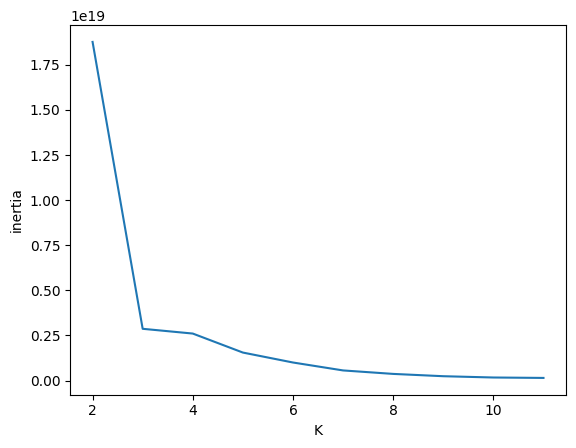

In [8]:
plt.plot(range(2,12),inertias)
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(X_res)
total_res['cluster'] = kmeans.labels_
total_res['cluster_chk'] = total_res['is_churn'] - total_res['cluster']
total_res['cluster_chk'].value_counts()


cluster_chk
 1    293802
 0    293795
-1         9
Name: count, dtype: int64